# Convert DVA scans into SPASS format
## A. Ordog, March 2023
#### March 24: added code to test new DVA files
### (1) Explore data structure in example file
### (2) Write out example DVA file in SPASS format
### (3) Test final DVA files in SPASS format

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import h5py
from astropy.time import Time

# (1) Explore data/metadata structure in SPASS files

## Example of Ettore's data files:

In [4]:
# Change directory as needed on elephant
scan = fits.open('/home/ordoga/Python/DVA2/east.2008-07-19_1350_spass_39D_1934.sdfits')
print(repr(scan[0].header))
print('')
print(repr(scan[1].header))

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT   Created by CALSCANS v1.1                                              
COMMENT   N. McClure-Griffiths & D. McConnell                                   
HISTORY  # Bandpass parameters determined from 0407_DEC                         
HISTORY  # from data file 2008-07-18_2056_0407_RADEC_GAL.rpf                    
HISTORY # NO POLARIZATION PARAMETER FILE FOUND                                  
HISTORY # Unit matrix will be applied                                           
HISTORY correction for instr

## Organize metadata by indices

In [5]:
headers1 = ['scan name', 
            'bandwidth (Hz)',
            'scan date', 
            'dt', 
            'Tsys',
            '?', 
            'f0 (Hz)',
            'df (Hz)',
            'focus tan',
            'focus rot']
idx1 = np.array([0,1,2,3,4,5,9,10,17,18])

headers2 = ['t bin',
            't [s past MJD start]',
            'RA',
            'dec',
            'az',
            'el']
idx2 = np.array([6,7,11,12,13,14])

headers3 = ['par. angle',
            'focus axi']
idx3 = np.array([15,16])

## Print out metadata for 5 different timestamps
## Indices indicate: scan[1].data[t_idx][idx], where idx lists different metadata

In [6]:
print('Values that stay constant with time within the aziuth scan:')
table = [idx1, headers1, np.array(scan[1].data[0],dtype='object')[idx1],
                         np.array(scan[1].data[1],dtype='object')[idx1],
                         np.array(scan[1].data[2],dtype='object')[idx1],
                         np.array(scan[1].data[500],dtype='object')[idx1],
                         np.array(scan[1].data[1887],dtype='object')[idx1]]
print(tabulate(table))

print('')
print('Values that change with time within the azimuth scan (understood)')
table = [idx2, headers2, np.array(scan[1].data[0],dtype='object')[idx2],
                         np.array(scan[1].data[1],dtype='object')[idx2],
                         np.array(scan[1].data[2],dtype='object')[idx2],
                         np.array(scan[1].data[500],dtype='object')[idx2],
                         np.array(scan[1].data[1887],dtype='object')[idx2]]
print(tabulate(table))

print('')
print('Values that change with time within the azimuth scan (NOT understood)')
table = [idx3, headers3, np.array(scan[1].data[0],dtype='object')[idx3],
                         np.array(scan[1].data[1],dtype='object')[idx3],
                         np.array(scan[1].data[2],dtype='object')[idx3],
                         np.array(scan[1].data[500],dtype='object')[idx3],
                         np.array(scan[1].data[1887],dtype='object')[idx3]]
print(tabulate(table))

Values that stay constant with time within the aziuth scan:
--------------  --------------  ----------  ----  ----  -  ------------  ---------  -------------------  ---------
0               1               2           3     4     5  9             10         17                   18
scan name       bandwidth (Hz)  scan date   dt    Tsys  ?  f0 (Hz)       df (Hz)    focus tan            focus rot
spass_39D_1934  240000000.0     2008-07-19  0.25  1.0   1  2180000000.0  8000000.0  0.08800000697374344  0.0
spass_39D_1934  240000000.0     2008-07-19  0.25  1.0   1  2180000000.0  8000000.0  0.08800000697374344  0.0
spass_39D_1934  240000000.0     2008-07-19  0.25  1.0   1  2180000000.0  8000000.0  0.08800000697374344  0.0
spass_39D_1934  240000000.0     2008-07-19  0.25  1.0   1  2180000000.0  8000000.0  0.08800000697374344  0.0
spass_39D_1934  240000000.0     2008-07-19  0.25  1.0   1  2180000000.0  8000000.0  0.08800000697374344  0.0
--------------  --------------  ----------  ----  ----  -

## Print out Stokes data for single time stamp

In [ ]:
print('Data in 30 frequency channels at single timestamp (120)')
print('')
print('Stokes I')
print(scan[1].data[120][8][0][0][0])
print('')
print('Stokes Q')
print(scan[1].data[120][8][0][0][1])
print('')
print('Stokes U')
print(scan[1].data[120][8][0][0][2])
print('')
print('Stokes V')
print(scan[1].data[120][8][0][0][3])
print(scan[1].data[120][8][0][0][3][0:3])

## Plot Stokes I,Q,U,V,PI vs t at single frequency for sanity check

In [ ]:
t = np.empty(len(scan[1].data))
for i in range(0,len(t)): t[i] = scan[1].data[i][7]
    
StokesI = np.empty(len(scan[1].data))
for i in range(0,len(t)): StokesI[i] = scan[1].data[i][8][0][0][0][10]  
StokesQ = np.empty(len(scan[1].data))
for i in range(0,len(t)): StokesQ[i] = scan[1].data[i][8][0][0][1][10]   
StokesU = np.empty(len(scan[1].data))
for i in range(0,len(t)): StokesU[i] = scan[1].data[i][8][0][0][2][10]   
StokesV = np.empty(len(scan[1].data))
for i in range(0,len(t)): StokesV[i] = scan[1].data[i][8][0][0][3][10]
    
plt.figure(figsize=(12,4))
plt.scatter(t,StokesI,s=5,label='Stokes I')
plt.scatter(t,StokesQ,s=5,label='Stokes Q')
plt.scatter(t,StokesU,s=5,label='Stokes U')
plt.scatter(t,StokesV,s=5,label='Stokes V')
plt.scatter(t,np.sqrt(StokesU**2+StokesQ**2),s=5,label='PI')
plt.legend()
plt.grid()

In [ ]:
az = np.empty(len(scan[1].data))
for i in range(0,len(t)): az[i] = scan[1].data[i][13] 
el = np.empty(len(scan[1].data))
for i in range(0,len(t)): el[i] = scan[1].data[i][14]  
RA = np.empty(len(scan[1].data))
for i in range(0,len(t)): RA[i] = scan[1].data[i][11] 
dec = np.empty(len(scan[1].data))
for i in range(0,len(t)): dec[i] = scan[1].data[i][12]

    
i1 = 0
i2 = 1888
plt.figure(figsize=(12,10))
plt.plot(t[i1:i2],az[i1:i2],label='az')
plt.plot(t[i1:i2],el[i1:i2],label='el')
plt.plot(t[i1:i2],RA[i1:i2],label='RA')
plt.plot(t[i1:i2],dec[i1:i2],label='dec')
plt.legend()
plt.grid()
plt.ylim(-100,200)

# Questions:
### (1) Why does azimuth value increment in jumps while RA/dec change smoothly?
### (2) Is it correct that most of the metadata is not used in the map-making code?
### (3) Why are RA and dec used directly from data to compute az/el rather than telescope generated az/el?

# (2) Generate example DVA file in SPASS format

## Read in example SPASS file

In [ ]:
# Change directory as needed on elephant
spass_file = fits.open('/home/ordoga/Python/DVA2/east.2008-07-19_1350_spass_39D_1934.sdfits')


## Read in example DVA file

In [3]:
dva_file = h5py.File('/media/ordoga/15m_band1_survey/dva_phase1/survey_phase1_day01/dva_survey_phase1_raw_0709.h5','r')
dva_dataset = dva_file['data']['beam_0']['band_SB0']['scan_0']

# Coordinates, times and noise flag:
dec = dva_dataset['metadata']['declination']
ra = dva_dataset['metadata']['right_ascension']
el = dva_dataset['metadata']['elevation']
az = dva_dataset['metadata']['azimuth']
t = dva_dataset['metadata']['utc']
noise = dva_dataset['metadata']['noise_state']

# Time in MJD:
t_mjd = Time(t, format='isot',scale='utc').mjd

# For the binned version, the following would be replaced
# by the medians calculated for each selected frequency.
# Here I am just randomly grabbing channels 100 to 103:
RR = dva_dataset['data'][:,0,100:103]
LL = dva_dataset['data'][:,1,100:103]
reRL = dva_dataset['data'][:,2,100:103]
imRL = dva_dataset['data'][:,3,100:103]
freq = dva_file['data']['beam_0']['band_SB0']['frequency'][100:103]

print(RR.shape)
print(freq.shape)
print(t_mjd.shape)

(1803, 3)
(3,)
(1803,)


## Set up values from DVA to go into SPASS file
### The only one that needs to be changed here is 'scanname' to include East or West

In [ ]:
dim       = len(t)    # number of datapoints (timestamps)
scannum   = 1    # Don't know what this is. Don't think it matters.
scanname  = 'phase1_0906'    # Just a descriptive string. Should include East or West.
bandwidth = 680e6    # Full survey bandwidth
date      = str(t[0])[2:12]    # Take date from first datapoint (extract just date, not time)
t_samp    = (t_mjd[1]-t_mjd[0])*24*3600    # Time sampling in seconds
Tsys      = 1.0    # Don't know what this is. Don't think it matters.
time_s    = (t_mjd-np.floor(t_mjd[0]))*24*3600
freq0     = 350e6    # Leave as this for now. Doesn't get used.
dfreq     = 1e6    # Leave as this for now. Doesn't get used.
StokesI   = 0.5*(RR+LL)
StokesQ   = reRL.copy()
StokesU   = imRL.copy()
StokesV   = 0.5*(RR-LL)    # Something like that. Good enough for now

# A few sanity checks:
print(dim,date,t_samp,StokesI.shape,time_s)

## Replace data in SPASS example file with DVA data

In [ ]:
# Copy SPASS file and trim it down to DVA length:
dva_new_file = spass_file.copy()
dva_new_file[1].data = spass_file[1].data[0:dim]
print(dva_new_file[1].data.shape)

# Loop through time data points and populate new file:
for i in range(0,dim):
    dva_new_file[1].data[i][0]  =  scanname
    dva_new_file[1].data[i][1]  =  bandwidth
    dva_new_file[1].data[i][2]  =  date
    dva_new_file[1].data[i][3]  =  t_samp
    dva_new_file[1].data[i][4]  =  Tsys
    dva_new_file[1].data[i][5]  =  scannum
    dva_new_file[1].data[i][7]  =  time_s[i]
    
    # Fill the first three channels with our Stokes values:
    dva_new_file[1].data[i][8][0][0][0][0:3] = StokesI[i,:]
    dva_new_file[1].data[i][8][0][0][1][0:3] = StokesQ[i,:]
    dva_new_file[1].data[i][8][0][0][2][0:3] = StokesU[i,:]
    dva_new_file[1].data[i][8][0][0][3][0:3] = StokesV[i,:]
    
    # I don't know how to reduce the size of the data array from
    # 30 frequency channels to 3, so for now fill the rest with
    # zero (we will just not make maps with these channels).
    dva_new_file[1].data[i][8][0][0][0][3:30] = 0
    dva_new_file[1].data[i][8][0][0][1][3:30] = 0
    dva_new_file[1].data[i][8][0][0][2][3:30] = 0
    dva_new_file[1].data[i][8][0][0][3][3:30] = 0
    
    dva_new_file[1].data[i][9]  =  freq0
    dva_new_file[1].data[i][10] =  dfreq
    dva_new_file[1].data[i][11] = RA[i]
    dva_new_file[1].data[i][12] = dec[i]
    dva_new_file[1].data[i][13] = az[i]
    dva_new_file[1].data[i][14] = el[i]
    

## Write out new file

In [ ]:
new_dva_filename = '/home/ordoga/Python/DVA2/test_dva_spass_file.fits'
dva_new_file.writeto(new_dva_filename,overwrite=True)

## Check to see how new file was populated

In [ ]:
headers1 = ['scan name', 
            'bandwidth (Hz)',
            'scan date', 
            'dt', 
            'Tsys',
            '?', 
            'f0 (Hz)',
            'df (Hz)',
            'focus tan',
            'focus rot']
idx1 = np.array([0,1,2,3,4,5,9,10,17,18])

headers2 = ['t bin',
            't [s past MJD start]',
            'RA',
            'dec',
            'az',
            'el']
idx2 = np.array([6,7,11,12,13,14])

headers3 = ['par. angle',
            'focus axi']
idx3 = np.array([15,16])

print('Values that stay constant with time within the aziuth scan:')
table = [idx1, headers1, np.array(dva_new_file[1].data[0],dtype='object')[idx1],
                         np.array(dva_new_file[1].data[1],dtype='object')[idx1],
                         np.array(dva_new_file[1].data[2],dtype='object')[idx1],
                         np.array(dva_new_file[1].data[200],dtype='object')[idx1],
                         np.array(dva_new_file[1].data[500],dtype='object')[idx1]]
print(tabulate(table))

print('')
print('Values that change with time within the azimuth scan (understood)')
table = [idx2, headers2, np.array(dva_new_file[1].data[0],dtype='object')[idx2],
                         np.array(dva_new_file[1].data[1],dtype='object')[idx2],
                         np.array(dva_new_file[1].data[2],dtype='object')[idx2],
                         np.array(dva_new_file[1].data[200],dtype='object')[idx2],
                         np.array(dva_new_file[1].data[500],dtype='object')[idx2]]
print(tabulate(table))

print('')
print('Values that change with time within the azimuth scan (NOT understood)')
table = [idx3, headers3, np.array(dva_new_file[1].data[0],dtype='object')[idx3],
                         np.array(dva_new_file[1].data[1],dtype='object')[idx3],
                         np.array(dva_new_file[1].data[2],dtype='object')[idx3],
                         np.array(dva_new_file[1].data[200],dtype='object')[idx3],
                         np.array(dva_new_file[1].data[500],dtype='object')[idx3]]
print(tabulate(table))

print('')
print('')
print('Data in 30 frequency channels at single timestamp (120)')
print('')
print('Stokes I')
print(dva_new_file[1].data[120][8][0][0][0])
print('')
print('Stokes Q')
print(dva_new_file[1].data[120][8][0][0][1])
print('')
print('Stokes U')
print(dva_new_file[1].data[120][8][0][0][2])
print('')
print('Stokes V')
print(dva_new_file[1].data[120][8][0][0][3])

# (3) Test final DVA files in SPASS format

## Read in example DVA East and West files:

In [2]:
dva_E_file = fits.open('/media/ordoga/15m_band1_survey/Mini_survey_SPASS_with_nans_highel/dva_survey_phase1_0041_Jy_E.fits')
#dva_W_file = fits.open('/home/ordoga/Python/DVA2/dva_survey_phase1_1775_Jy_W.fits')

####################################
dva_new_file = dva_E_file.copy()
####################################

headers1 = ['scan name', 
            'bandwidth (Hz)',
            'scan date', 
            'dt', 
            'Tsys',
            '?', 
            'f0 (Hz)',
            'df (Hz)']
idx1 = np.array([0,1,2,3,4,5,9,10])

headers2 = ['t bin',
            't [s past MJD start]',
            'RA',
            'dec',
            'az',
            'el']
idx2 = np.array([6,7,11,12,13,14])

headers3 = ['par. angle',
            'focus axi']
idx3 = np.array([15,16])

print('Values that stay constant with time within the aziuth scan:')
table = [idx1, headers1, np.array(dva_new_file[1].data[0],dtype='object')[idx1],
                         np.array(dva_new_file[1].data[1],dtype='object')[idx1],
                         np.array(dva_new_file[1].data[2],dtype='object')[idx1],
                         np.array(dva_new_file[1].data[200],dtype='object')[idx1],
                         np.array(dva_new_file[1].data[899],dtype='object')[idx1]]
print(tabulate(table))

print('')
print('Values that change with time within the azimuth scan (understood)')
table = [idx2, headers2, np.array(dva_new_file[1].data[0],dtype='object')[idx2],
                         np.array(dva_new_file[1].data[1],dtype='object')[idx2],
                         np.array(dva_new_file[1].data[2],dtype='object')[idx2],
                         np.array(dva_new_file[1].data[450],dtype='object')[idx2],
                         np.array(dva_new_file[1].data[899],dtype='object')[idx2]]
print(tabulate(table))

print('')
print('Values that change with time within the azimuth scan (NOT understood)')
table = [idx3, headers3, np.array(dva_new_file[1].data[0],dtype='object')[idx3],
                         np.array(dva_new_file[1].data[1],dtype='object')[idx3],
                         np.array(dva_new_file[1].data[2],dtype='object')[idx3],
                         np.array(dva_new_file[1].data[450],dtype='object')[idx3],
                         np.array(dva_new_file[1].data[899],dtype='object')[idx3]]
print(tabulate(table))

print('')
print('')
print('Data in 30 frequency channels at single timestamp (120)')
print('')
print('Stokes I')
print(dva_new_file[1].data[120][8][0][0][0])
print('')
print('Stokes Q')
print(dva_new_file[1].data[120][8][0][0][1])
print('')
print('Stokes U')
print(dva_new_file[1].data[120][8][0][0][2])
print('')
print('Stokes V')
print(dva_new_file[1].data[120][8][0][0][3])

Values that stay constant with time within the aziuth scan:
----------------  --------------  ----------  ------------------  ----  -  -----------  ---------
0                 1               2           3                   4     5  9            10
scan name         bandwidth (Hz)  scan date   dt                  Tsys  ?  f0 (Hz)      df (Hz)
phase1_0041_Jy_E  680000000.0     2022-06-07  0.5999999046325684  1.0   1  350000000.0  1000000.0
phase1_0041_Jy_E  680000000.0     2022-06-07  0.5999999046325684  1.0   1  350000000.0  1000000.0
phase1_0041_Jy_E  680000000.0     2022-06-07  0.5999999046325684  1.0   1  350000000.0  1000000.0
phase1_0041_Jy_E  680000000.0     2022-06-07  0.5999999046325684  1.0   1  350000000.0  1000000.0
phase1_0041_Jy_E  680000000.0     2022-06-07  0.5999999046325684  1.0   1  350000000.0  1000000.0
----------------  --------------  ----------  ------------------  ----  -  -----------  ---------

Values that change with time within the azimuth scan (understood)


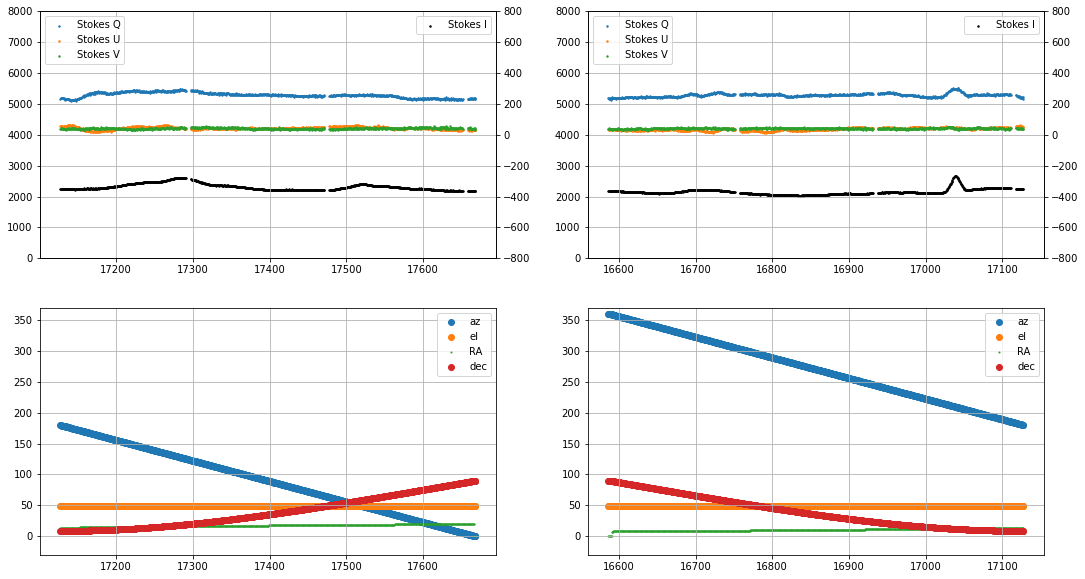

In [3]:
fig,axs = plt.subplots(2,2,figsize=(18,10))  

#dva_E_file = fits.open('/home/ordoga/Python/DVA2/dva_survey_phase1_1363_Jy_E.fits')
#dva_W_file = fits.open('/home/ordoga/Python/DVA2/dva_survey_phase1_1363_Jy_W.fits')

dva_E_file = fits.open('/media/ordoga/15m_band1_survey/Mini_survey_SPASS_with_nans_highel/dva_survey_phase1_0042_Jy_E.fits')
dva_W_file = fits.open('/media/ordoga/15m_band1_survey/Mini_survey_SPASS_with_nans_highel/dva_survey_phase1_0042_Jy_W.fits')

t = np.empty(len(dva_E_file[1].data))
for i in range(0,len(t)): t[i] = dva_E_file[1].data[i][7]
StokesI = np.empty(len(dva_E_file[1].data))
for i in range(0,len(t)): StokesI[i] = dva_E_file[1].data[i][8][0][0][0][0]  
StokesQ = np.empty(len(dva_E_file[1].data))
for i in range(0,len(t)): StokesQ[i] = dva_E_file[1].data[i][8][0][0][1][0]   
StokesU = np.empty(len(dva_E_file[1].data))
for i in range(0,len(t)): StokesU[i] = dva_E_file[1].data[i][8][0][0][2][0]   
StokesV = np.empty(len(dva_E_file[1].data))
for i in range(0,len(t)): StokesV[i] = dva_E_file[1].data[i][8][0][0][3][0]
    
az = np.empty(len(dva_E_file[1].data))
for i in range(0,len(t)): az[i] = dva_E_file[1].data[i][13] 
el = np.empty(len(dva_E_file[1].data))
for i in range(0,len(t)): el[i] = dva_E_file[1].data[i][14]  
RA = np.empty(len(dva_E_file[1].data))
for i in range(0,len(t)): RA[i] = dva_E_file[1].data[i][11] 
dec = np.empty(len(dva_E_file[1].data))
for i in range(0,len(t)): dec[i] = dva_E_file[1].data[i][12]
    
axs[0,0].scatter(t,StokesI,s=2,label='Stokes I',color='k')
ax2 = axs[0,0].twinx()
ax2.scatter(t,StokesQ,s=2,label='Stokes Q')
ax2.scatter(t,StokesU,s=2,label='Stokes U')
ax2.scatter(t,StokesV,s=2,label='Stokes V')
ax2.set_ylim(-800,800)
ax2.legend(loc='upper left')
        
axs[1,0].scatter(t,az,label='az')
axs[1,0].scatter(t,el,label='el')
axs[1,0].scatter(t,RA,label='RA',s=1)
axs[1,0].scatter(t,dec,label='dec')


t = np.empty(len(dva_W_file[1].data))
for i in range(0,len(t)): t[i] = dva_W_file[1].data[i][7]
StokesI = np.empty(len(dva_W_file[1].data))
for i in range(0,len(t)): StokesI[i] = dva_W_file[1].data[i][8][0][0][0][0]  
StokesQ = np.empty(len(dva_W_file[1].data))
for i in range(0,len(t)): StokesQ[i] = dva_W_file[1].data[i][8][0][0][1][0]   
StokesU = np.empty(len(dva_W_file[1].data))
for i in range(0,len(t)): StokesU[i] = dva_W_file[1].data[i][8][0][0][2][0]   
StokesV = np.empty(len(dva_W_file[1].data))
for i in range(0,len(t)): StokesV[i] = dva_W_file[1].data[i][8][0][0][3][0]
    
az = np.empty(len(dva_W_file[1].data))
for i in range(0,len(t)): az[i] = dva_W_file[1].data[i][13] 
el = np.empty(len(dva_W_file[1].data))
for i in range(0,len(t)): el[i] = dva_W_file[1].data[i][14]  
RA = np.empty(len(dva_W_file[1].data))
for i in range(0,len(t)): RA[i] = dva_W_file[1].data[i][11] 
dec = np.empty(len(dva_W_file[1].data))
for i in range(0,len(t)): dec[i] = dva_W_file[1].data[i][12]
    
axs[0,1].scatter(t,StokesI,s=2,label='Stokes I',color='k')
ax2 = axs[0,1].twinx()
ax2.scatter(t,StokesQ,s=2,label='Stokes Q')
ax2.scatter(t,StokesU,s=2,label='Stokes U')
ax2.scatter(t,StokesV,s=2,label='Stokes V')
ax2.set_ylim(-800,800)
ax2.legend(loc='upper left')

axs[1,1].scatter(t,az,label='az')
axs[1,1].scatter(t,el,label='el')
axs[1,1].scatter(t,RA,label='RA',s=1)
axs[1,1].scatter(t,dec,label='dec')


for i in range(0,2):
    for j in range(0,2):
        axs[i,j].legend(loc='upper right')
        axs[i,j].grid()
        axs[0,j].set_ylim(0,8000)
        axs[1,j].set_ylim(-30,370)
        #axs[1,j].set_ylim(23,25)

In [2]:
dva_file = h5py.File('/home/ordoga/Python/DVA2/dva_survey_phase1_1775_Jy.h5','r')
dva_dataset = dva_file['data']['beam_0']['band_SB0']['scan_0']

# Coordinates, times and noise flag:
dec = dva_dataset['metadata']['declination']
ra = dva_dataset['metadata']['right_ascension']
el = dva_dataset['metadata']['elevation']
az = dva_dataset['metadata']['azimuth']
t = dva_dataset['metadata']['utc']
noise = dva_dataset['metadata']['noise_state']

# Time in MJD:
t_mjd = Time(t, format='isot',scale='utc').mjd

# For the binned version, the following would be replaced
# by the medians calculated for each selected frequency.
# Here I am just randomly grabbing channels 100 to 103:

i1 = 900
i2 = 903

RR = dva_dataset['data'][:,0,i1:i2]
LL = dva_dataset['data'][:,1,i1:i2]
reRL = dva_dataset['data'][:,2,i1:i2]
imRL = dva_dataset['data'][:,3,i1:i2]
freq = dva_file['data']['beam_0']['band_SB0']['frequency'][i1:i2]

print(RR.shape)
print(freq/1e6)
print(t_mjd.shape)

(1804, 3)
[418.77083333 418.85416667 418.9375    ]
(1804,)


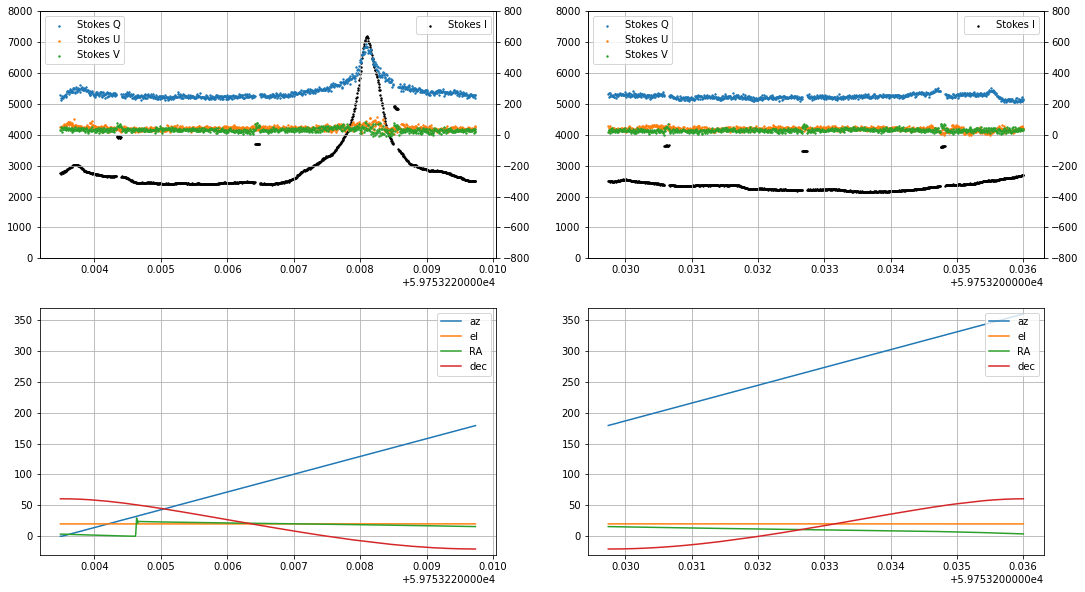

In [3]:
fig,axs = plt.subplots(2,2,figsize=(18,10))  

t_use = t_mjd[0:900]
StokesI = 0.5*(RR+LL)[0:900,0]
StokesQ = reRL[0:900,0]
StokesU = imRL[0:900,0]
StokesV = 0.5*(RR-LL)[0:900,0]
    
axs[0,0].scatter(t_use,StokesI,s=2,label='Stokes I',color='k')
ax2 = axs[0,0].twinx()
ax2.scatter(t_use,StokesQ,s=2,label='Stokes Q')
ax2.scatter(t_use,StokesU,s=2,label='Stokes U')
ax2.scatter(t_use,StokesV,s=2,label='Stokes V')
ax2.set_ylim(-800,800)
ax2.legend(loc='upper left')
        
axs[1,0].plot(t_use,az[0:900],label='az')
axs[1,0].plot(t_use,el[0:900],label='el')
axs[1,0].plot(t_use,ra[0:900],label='RA')
axs[1,0].plot(t_use,dec[0:900],label='dec')


t_use = t_mjd[900:1803]
StokesI = 0.5*(RR+LL)[900:1803,0]
StokesQ = reRL[900:1803,0]
StokesU = imRL[900:1803,0]
StokesV = 0.5*(RR-LL)[900:1803,0]
    
axs[0,1].scatter(t_use,StokesI,s=2,label='Stokes I',color='k')
ax2 = axs[0,1].twinx()
ax2.scatter(t_use,StokesQ,s=2,label='Stokes Q')
ax2.scatter(t_use,StokesU,s=2,label='Stokes U')
ax2.scatter(t_use,StokesV,s=2,label='Stokes V')
ax2.set_ylim(-800,800)
ax2.legend(loc='upper left')

axs[1,1].plot(t_use,az[900:1803],label='az')
axs[1,1].plot(t_use,el[900:1803],label='el')
axs[1,1].plot(t_use,ra[900:1803],label='RA')
axs[1,1].plot(t_use,dec[900:1803],label='dec')


for i in range(0,2):
    for j in range(0,2):
        axs[i,j].legend(loc='upper right')
        axs[i,j].grid()
        axs[0,j].set_ylim(0,8000)
        axs[1,j].set_ylim(-30,370)

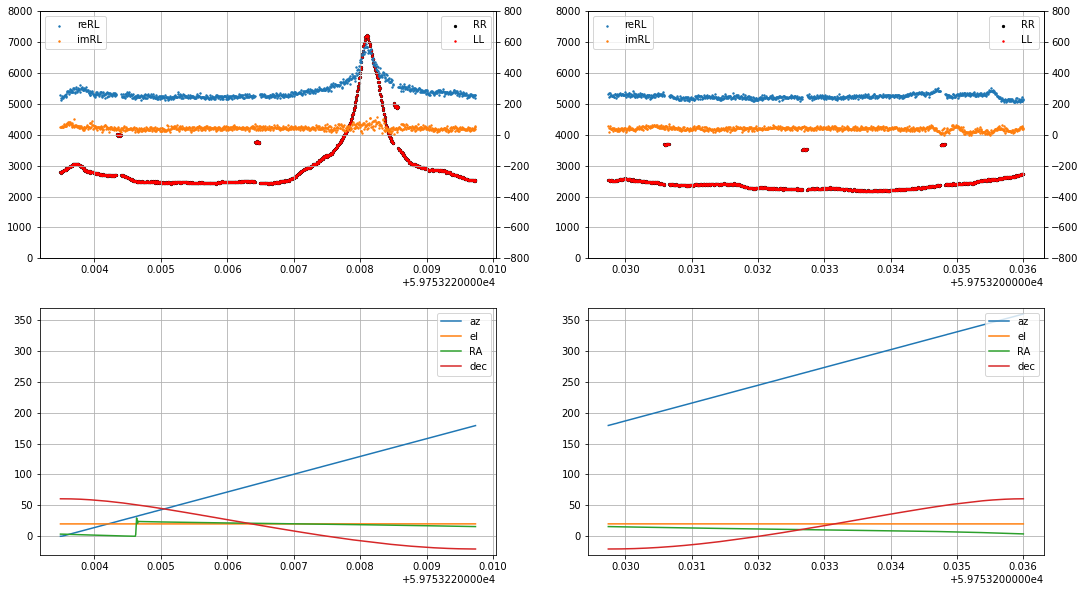

In [4]:
fig,axs = plt.subplots(2,2,figsize=(18,10))  

t_use = t_mjd[0:900]
RR_plt = RR[0:900,0]
LL_plt = RR[0:900,0]
reRL_plt = reRL[0:900,0]
imRL_plt = imRL[0:900,0]
    
axs[0,0].scatter(t_use,RR_plt,s=5,label='RR',color='k')
axs[0,0].scatter(t_use,LL_plt,s=2,label='LL',color='r')
ax2 = axs[0,0].twinx()
ax2.scatter(t_use,reRL_plt,s=2,label='reRL')
ax2.scatter(t_use,imRL_plt,s=2,label='imRL')
ax2.set_ylim(-800,800)
ax2.legend(loc='upper left')
        
axs[1,0].plot(t_use,az[0:900],label='az')
axs[1,0].plot(t_use,el[0:900],label='el')
axs[1,0].plot(t_use,ra[0:900],label='RA')
axs[1,0].plot(t_use,dec[0:900],label='dec')


t_use = t_mjd[900:1803]
RR_plt = RR[900:1803,0]
LL_plt = RR[900:1803,0]
reRL_plt = reRL[900:1803,0]
imRL_plt = imRL[900:1803,0]
    
axs[0,1].scatter(t_use,RR_plt,s=5,label='RR',color='k')
axs[0,1].scatter(t_use,LL_plt,s=2,label='LL',color='r')
ax2 = axs[0,1].twinx()
ax2.scatter(t_use,reRL_plt,s=2,label='reRL')
ax2.scatter(t_use,imRL_plt,s=2,label='imRL')
ax2.set_ylim(-800,800)
ax2.legend(loc='upper left')

axs[1,1].plot(t_use,az[900:1803],label='az')
axs[1,1].plot(t_use,el[900:1803],label='el')
axs[1,1].plot(t_use,ra[900:1803],label='RA')
axs[1,1].plot(t_use,dec[900:1803],label='dec')


for i in range(0,2):
    for j in range(0,2):
        axs[i,j].legend(loc='upper right')
        axs[i,j].grid()
        axs[0,j].set_ylim(0,8000)
        axs[1,j].set_ylim(-30,370)

[0 0 0 ... 0 0 0]


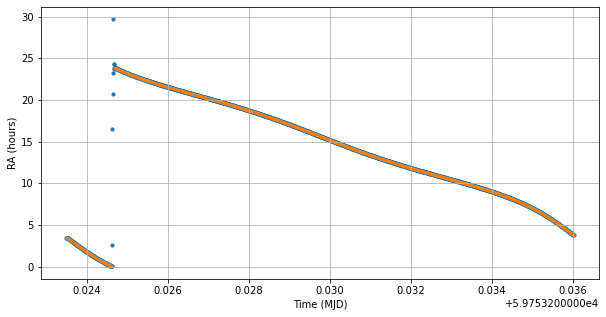

In [15]:
#RAflag = dva_dataset['metadata']['noise_state']

print(dva_dataset['metadata']['trim_scan_flag'])
ra_good = ra.copy()
ra_good[dva_dataset['metadata']['trim_scan_flag']==1] = np.nan

fig,axs = plt.subplots(1,1,figsize=(10,5))  
axs.scatter(t_mjd,ra,s=10)
axs.scatter(t_mjd,ra_good,s=2)
axs.set_xlabel('Time (MJD)')
axs.set_ylabel('RA (hours)')
axs.grid()

In [96]:
hduQ = fits.open('/home/ordoga/spassMap_AO_BB/hmap_ALL_AbsCal_des_128_64_3_Q.fits')
hdrQ = hduQ[1].header


In [97]:
hdrQ

XTENSION= 'BINTABLE'           / Written by IDL:  Wed Apr  5 16:45:09 2023      
BITPIX  =                    8 /                                                
NAXIS   =                    2 / Binary table                                   
NAXIS1  =                 4096 / Number of bytes per row                        
NAXIS2  =                  192 / Number of rows                                 
PCOUNT  =                    0 / Random parameter count                         
GCOUNT  =                    1 / Group count                                    
TFIELDS =                    1 / Number of columns                              
TFORM1  = '1024E   '           / Real*4 (floating point)                        
TTYPE1  = 'UNKNOWN1'           /unknown content                                 
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
NSIDE   =                  1

In [98]:
this = np.empty([192,1024])
for i in range(0,192):
    this[0,:] = np.array(dataQ[i])
    #print(len(dataQ[i][0]))

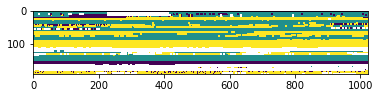

In [101]:
plt.imshow(this,vmin=-10,vmax=10)

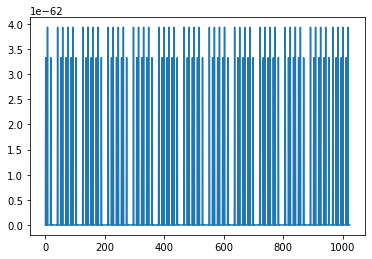

In [74]:
plt.plot(this2[100,:])

In [53]:
dataQ= hduQ[1].data
print(dataQ.shape)
print(len(dataQ[0][0]))

(192,)
1024


In [46]:
#import matplotlib.pyplot as plt
import healpy as hp
from astropy.io import fits


# Extract the HEALPix map data from the binary table extension
healpix_map = hduQ[1].data#['TTYPE1']
# Extract the HEALPix parameters from the header
nside = hduQ[1].header['NSIDE']
ordering = hduQ[1].header['ORDERING']
# Visualize the map in Mollweide projection
hp.mollview(healpix_map, title='HEALPix Map', cmap='jet')
plt.show()

TypeError: bad number of pixels

In [49]:
# Extract the HEALPix map data from the binary table extension
healpix_map = hduQ[1].data['UNKNOWN1']
# Extract the HEALPix parameters from the header
nside = hduQ[1].header['NSIDE']
ordering = hduQ[1].header['ORDERING']
npix = len(healpix_map)
print(hp.nside2npix(nside),npix)
# Check the number of pixels
if npix != hp.nside2npix(nside):
      print("Error: bad number of pixels")

196608 192
Error: bad number of pixels
